**4. Tarea 4: Modelamiento**

>4.1 Particionamiento del conjunto de datos en entrenamiento y prueba


Modelamiento con Variable Y normalizada

 >4.2 Entrenamiento de un primer modelo de regresión lineal

  >>4.2.1 Validación Cuantitativa

  >>4.2.2 Validación Cualitativa

 >4.3 Entrenamiento de un segundo modelo aplicando regularización

  >>4.3.1 Validación Cuantitativa

  >>4.3.2 Validación Cualitativa

 >4.4 Entrenamiento de un tercer modelo aplicando Bagging

  >>4.4.1 Validación Cuantitativa

  >>4.4.2 Validación Cualitativa


Modelamiento con Variable Y sin normalización

 >4.2 Entrenamiento de un primer modelo de regresión lineal

  >>4.2.1 Validación Cuantitativa

  >>4.2.2 Validación Cualitativa

 >4.3 Entrenamiento de un segundo modelo aplicando regularización

  >>4.3.1 Validación Cuantitativa

  >>4.3.2 Validación Cualitativa

 >>4.4 Entrenamiento de un tercer modelo aplicando Bagging

  >>4.4.1 Validación Cuantitativa

  >>4.4.2 Validación Cualitativa


In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

In [43]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

### Carga de datos

In [44]:
data_df = pd.read_csv("clean_data.csv", sep=',')
data_df.head()

,Unnamed: 0,PUNT_GLOBAL,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si,COLE_AREA_UBICACION_URBANO,FAMI_EDUCACIONMADRE_no presenta,FAMI_EDUCACIONMADRE_básica,FAMI_EDUCACIONMADRE_media,FAMI_EDUCACIONPADRE_no presenta,FAMI_EDUCACIONPADRE_básica,FAMI_EDUCACIONPADRE_media,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6
0,1,332.0,True,True,True,True,True,False,False,True,False,True,False,False,True,False,False,False
1,2,257.0,False,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False
2,3,251.0,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False
3,4,251.0,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False
4,5,329.0,True,True,True,True,True,False,False,False,False,False,True,False,True,False,False,False


In [45]:
#Quitar variable Unnamed:o
data_df.drop(columns=['Unnamed: 0'], inplace=True)
#Cuenta los nulos
data_df.isnull().sum()

PUNT_GLOBAL                        0
FAMI_TIENEAUTOMOVIL_Si             0
FAMI_TIENECOMPUTADOR_Si            0
FAMI_TIENEINTERNET_Si              0
FAMI_TIENELAVADORA_Si              0
COLE_AREA_UBICACION_URBANO         0
FAMI_EDUCACIONMADRE_no presenta    0
FAMI_EDUCACIONMADRE_básica         0
FAMI_EDUCACIONMADRE_media          0
FAMI_EDUCACIONPADRE_no presenta    0
FAMI_EDUCACIONPADRE_básica         0
FAMI_EDUCACIONPADRE_media          0
FAMI_ESTRATOVIVIENDA_Estrato 2     0
FAMI_ESTRATOVIVIENDA_Estrato 3     0
FAMI_ESTRATOVIVIENDA_Estrato 4     0
FAMI_ESTRATOVIVIENDA_Estrato 5     0
FAMI_ESTRATOVIVIENDA_Estrato 6     0
dtype: int64

In [46]:
data_df_modeling =data_df.copy()

## Tarea 4: Modelamiento Y no escalada

### 4.1 Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.
Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.

In [47]:
#Separar variables indepnedientes y de interes
X = data_df_modeling.drop("PUNT_GLOBAL", axis=1)
Y = data_df_modeling["PUNT_GLOBAL"]

In [15]:
#Normalizar variables númericas: features_numericas
#features_numericas_wiyhout_y= features_numericas

In [16]:
#Separamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Escalamiento
# Inicializar el objeto StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#Escalamiento en X
#X_train[features_numericas] = scaler_X.fit_transform(X_train[features_numericas])
#X_test[features_numericas] = scaler_X.transform(X_test[features_numericas])

#Adecuamos a numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

#Escalamiento en Y
#y_train= scaler_y.fit_transform(y_train)
#y_test = scaler_y.transform(y_test)

#Imprimimos dimensiones
print("Train shape:  ",X_train.shape, y_train.shape)
print("Test shape:  ",X_test.shape, y_test.shape)

#Media y desvest
print("Media de X_train_scaled:", np.mean(X_train, axis=0))
print("Media de y_train_scaled:", np.mean(y_train, axis=0))



Train shape:   (62742, 16) (62742, 1)
Test shape:   (26890, 16) (26890, 1)
Media de X_train_scaled: [0.27356476 0.62929138 0.61727392 0.75238277 0.86944949 0.03480922
 0.2673807  0.43117848 0.098658   0.3288228  0.36962481 0.36265978
 0.21994836 0.04121641 0.01193778 0.00447866]
Media de y_train_scaled: [254.59534283]


### 4.2 Entrenamiento de un primer modelo de regresión lineal

Se dice que la regresión es lineal dado que se asume una relación lineal entre las variables de entrada (features) y la variable objetivo (target).
En Scikit-Learn existen varias formas de implementar el algoritmo de regresión lieal, pero dado que el objetivo de esta practica esta enfocado en el análisis del modelo resultante y no tanto del algoritmo o del proceso de entrenamiento, se utilizará la implementación más sencilla dada por la clase LinearRegression.

In [17]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

coeficientes=model.coef_[0]
features = X.columns

for i, feature in enumerate(features):
  print(f"Coeficiente de {feature}: {coeficientes[i]}")

print(f"\nIntercepto: {model.intercept_[0]}")

Coeficiente de FAMI_TIENEAUTOMOVIL_Si: 2.6455104558916567
Coeficiente de FAMI_TIENECOMPUTADOR_Si: 7.376463853122136
Coeficiente de FAMI_TIENEINTERNET_Si: 3.9831811268082116
Coeficiente de FAMI_TIENELAVADORA_Si: 2.6413986271667462
Coeficiente de COLE_AREA_UBICACION_URBANO: -3.0611699748047303
Coeficiente de FAMI_EDUCACIONMADRE_no presenta: -22.38813264553304
Coeficiente de FAMI_EDUCACIONMADRE_básica: -20.381362870257238
Coeficiente de FAMI_EDUCACIONMADRE_media: -13.54344769863283
Coeficiente de FAMI_EDUCACIONPADRE_no presenta: -14.966785366297767
Coeficiente de FAMI_EDUCACIONPADRE_básica: -17.86398509154922
Coeficiente de FAMI_EDUCACIONPADRE_media: -13.008383875099819
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 2: -0.70441715439153
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 3: 2.9848453835640014
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 4: 5.834299709915722
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 5: 12.284528681022799
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 6: 14.402787353688

**Validación Cuantitativa**

In [18]:
# Obtener las predicciones para el set Train
y_pred = model.predict(X_train)
y_train_original = y_train

# MAE
mae = mean_absolute_error(y_train_original, y_pred)
# MSE
mse = mean_squared_error(y_train_original, y_pred)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_train,y_train))

MAE: 33.97136805166479
MSE: 1780.3948629212794
RMSE: 42.19472553437549
R2: 0.1378547668432596


In [19]:
# Obtener las predicciones para el set Tes
y_pred_test = model.predict(X_test)
y_test_original = y_test

# MAE
mae = mean_absolute_error(y_test_original, y_pred_test)
# MSE
mse = mean_squared_error(y_test_original, y_pred_test)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_test,y_test))

MAE: 34.07146483308284
MSE: 1787.0348606791354
RMSE: 42.27333510239209
R2: 0.1399092416976323


**Validación Cualitativa**

In [20]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

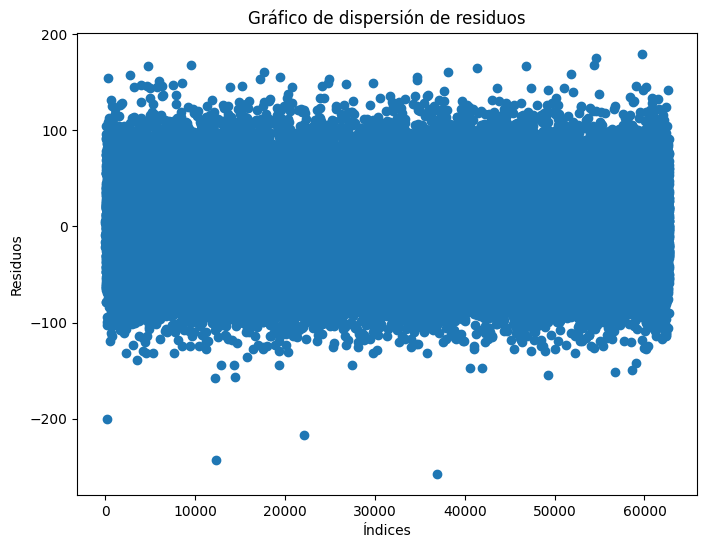

In [21]:
#residuos de la prediccion
residuals = y_train - y_pred
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.3 Entrenamiento de un segundo modelo de regresión lineal (LASSO)

In [22]:
# Crear el modelo
model_lasso = Lasso(alpha=0.01)

# Entrenar el modelo
model_lasso.fit(X_train, y_train)

# Initialize an empty list to store selected features
selected_features = []
selected_features_index = []
feature_names = X.columns
for i, feature in enumerate(feature_names):
  if abs(model_lasso.coef_[i]) > 0.0001:
    selected_features.append(feature)
    selected_features_index.append(i)
    print(f"Coeficiente de {feature}: {model_lasso.coef_[i]}")

print("Intercept: ", model_lasso.intercept_[0])

Coeficiente de FAMI_TIENEAUTOMOVIL_Si: 2.7286312458949067
Coeficiente de FAMI_TIENECOMPUTADOR_Si: 7.3841712125894094
Coeficiente de FAMI_TIENEINTERNET_Si: 4.0120120884642265
Coeficiente de FAMI_TIENELAVADORA_Si: 2.6250811303540043
Coeficiente de COLE_AREA_UBICACION_URBANO: -2.9571608156407994
Coeficiente de FAMI_EDUCACIONMADRE_no presenta: -22.07877250136016
Coeficiente de FAMI_EDUCACIONMADRE_básica: -20.322275337707143
Coeficiente de FAMI_EDUCACIONMADRE_media: -13.492909995670828
Coeficiente de FAMI_EDUCACIONPADRE_no presenta: -14.845844040499438
Coeficiente de FAMI_EDUCACIONPADRE_básica: -17.80081820395575
Coeficiente de FAMI_EDUCACIONPADRE_media: -12.923776303307191
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 2: -0.7683822735977018
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 3: 2.847754123933644
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 4: 5.504525459296725
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 5: 11.357833550243873
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 6: 12.082937438

**Validación Cuantitativa**

In [23]:
# Obtener las predicciones para el set Train
y_pred_lasso = model_lasso.predict(X_train).reshape(-1,1)
y_train_original = y_train
# MAE
mae_lasso  = mean_absolute_error(y_train_original, y_pred_lasso)
# MSE
mse_lasso  = mean_squared_error(y_train_original, y_pred_lasso)
# RMSE
rmse_lasso  = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_train,y_train))

MAE: 33.97455240082708
MSE: 1780.4382329717896
RMSE: 42.27333510239209
R2: 0.13783376516375134


In [24]:
# Obtener las predicciones para el set Test
y_pred_test_lasso = model_lasso.predict(X_test)
y_test_original = y_test
# MAE
mae_lasso = mean_absolute_error(y_test_original, y_pred_test_lasso)
# MSE
mse_lasso = mean_squared_error(y_test_original, y_pred_test_lasso)
# RMSE
rmse_lasso = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_test,y_test))

MAE: 34.07453360938076
MSE: 1787.0108038242042
RMSE: 42.27333510239209
R2: 0.13992082013913631


**Validación Cualitativa**

In [25]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

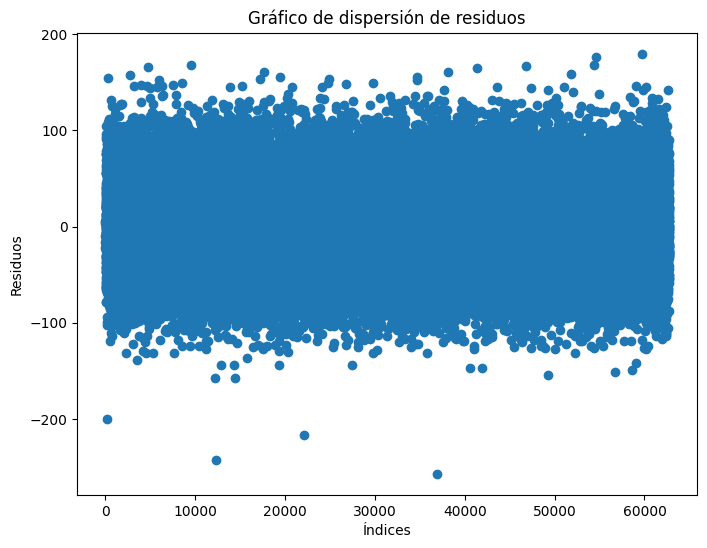

In [26]:
#residuos de la prediccion
residuals = y_train - y_pred_lasso.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.4 Entrenamiento de un tercer modelo de regresión lineal (BAGGING)

In [27]:
from sklearn.ensemble import BaggingRegressor

# Crear el modelo base (Lasso)
model = LinearRegression()

# Crear el modelo Bagging con Lasso como estimador base
bagging_lasso = BaggingRegressor(model, n_estimators=15, random_state=42)

# Entrenar el modelo Bagging
bagging_lasso.fit(X_train[:, selected_features_index], y_train)

c:\Users\juani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=LinearRegression(), n_estimators=15, random_state=42)

**Validación Cuantitativa**

In [28]:
# Obtener las predicciones para el conjunto de entrenamiento
y_pred_train_bagging = bagging_lasso.predict(X_train[:, selected_features_index])
y_train_original = y_train

# Calcular las métricas de evaluación para el conjunto de entrenamiento
mae_train_bagging = mean_absolute_error(y_train_original, y_pred_train_bagging)
mse_train_bagging = mean_squared_error(y_train_original, y_pred_train_bagging)
rmse_train_bagging = np.sqrt(mse_train_bagging)
r2_train_bagging = bagging_lasso.score(X_train[:, selected_features_index], y_train)


# Imprimir las métricas de evaluación
print("Métricas de evaluación para el conjunto de entrenamiento:")
print("MAE:", mae_train_bagging)
print("MSE:", mse_train_bagging)
print("RMSE:", rmse_train_bagging)
print("R2:", r2_train_bagging)

Métricas de evaluación para el conjunto de entrenamiento:
MAE: 33.97186316925131
MSE: 1780.4298092670786
RMSE: 42.19513964033155
R2: 0.13783784429081103


In [29]:
# Obtener las predicciones para el conjunto de prueba
y_pred_test_bagging = bagging_lasso.predict(X_test[:, selected_features_index])
y_test_original = y_test

# Calcular las métricas de evaluación para el conjunto de prueba
mae_test_bagging = mean_absolute_error(y_test_original, y_pred_test_bagging)
mse_test_bagging = mean_squared_error(y_test, y_pred_test_bagging)
rmse_test_bagging = np.sqrt(mse_test_bagging)
r2_test_bagging = bagging_lasso.score(X_test[:, selected_features_index], y_test)

# Imprimir los resultados
print("Métricas de evaluación para el conjunto de prueba:")
print("MAE:", mae_test_bagging)
print("MSE:", mse_test_bagging)
print("RMSE:", rmse_test_bagging)
print("R2:", r2_test_bagging)

Métricas de evaluación para el conjunto de prueba:
MAE: 34.07075083252178
MSE: 1787.019522218775
RMSE: 42.27315368196197
R2: 0.1399166240203239


**Validación Cualitativa**

In [30]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

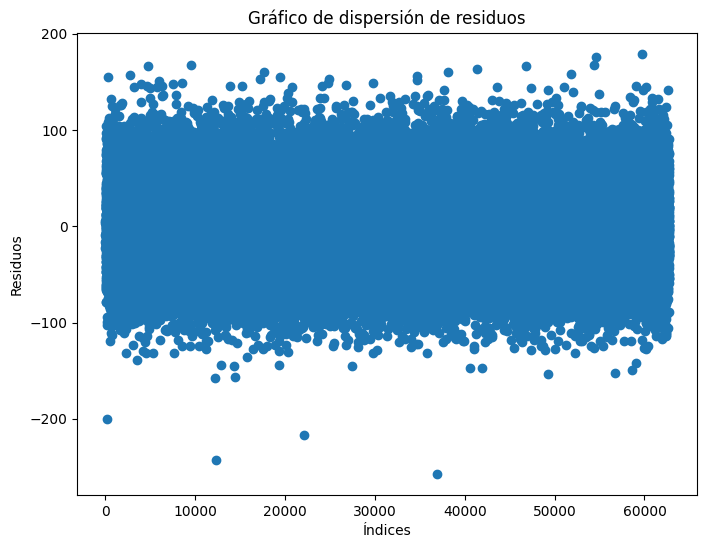

In [31]:
#residuos de la prediccion
residuals = y_train - y_pred_train_bagging.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

## Tarea 4: Modelamiento Y escalada

### 4.1 Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.
Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.

In [48]:
#Separar variables indepnedientes y de interes
X = data_df_modeling.drop("PUNT_GLOBAL", axis=1)
Y = data_df_modeling["PUNT_GLOBAL"]

In [33]:
#Normalizar variables númericas: features_numericas
#features_numericas_wiyhout_y= features_numericas

In [50]:
#Separamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Escalamiento
# Inicializar el objeto StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#Escalamiento en X
#X_train[features_numericas] = scaler_X.fit_transform(X_train[features_numericas])
#X_test[features_numericas] = scaler_X.transform(X_test[features_numericas])

#Adecuamos a numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

#Escalamiento en Y
y_train= scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

#Imprimimos dimensiones
print("Train shape:  ",X_train.shape, y_train.shape)
print("Test shape:  ",X_test.shape, y_test.shape)

#Media y desvest
print("Media de X_train_scaled:", np.mean(X_train, axis=0))
print("Media de y_train_scaled:", np.mean(y_train, axis=0))



Train shape:   (62742, 16) (62742, 1)
Test shape:   (26890, 16) (26890, 1)
Media de X_train_scaled: [0.27356476 0.62929138 0.61727392 0.75238277 0.86944949 0.03480922
 0.2673807  0.43117848 0.098658   0.3288228  0.36962481 0.36265978
 0.21994836 0.04121641 0.01193778 0.00447866]
Media de y_train_scaled: [2.12906879e-16]


### 4.2 Entrenamiento de un primer modelo de regresión lineal

Se dice que la regresión es lineal dado que se asume una relación lineal entre las variables de entrada (features) y la variable objetivo (target).
En Scikit-Learn existen varias formas de implementar el algoritmo de regresión lieal, pero dado que el objetivo de esta practica esta enfocado en el análisis del modelo resultante y no tanto del algoritmo o del proceso de entrenamiento, se utilizará la implementación más sencilla dada por la clase LinearRegression.

In [51]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

coeficientes=model.coef_[0]
features = X.columns

for i, feature in enumerate(features):
  print(f"Coeficiente de {feature}: {coeficientes[i]}")

print(f"\nIntercepto: {model.intercept_[0]}")

Coeficiente de FAMI_TIENEAUTOMOVIL_Si: 0.058215888716999564
Coeficiente de FAMI_TIENECOMPUTADOR_Si: 0.16232307751487884
Coeficiente de FAMI_TIENEINTERNET_Si: 0.08765205546681681
Coeficiente de FAMI_TIENELAVADORA_Si: 0.058125405701526536
Coeficiente de COLE_AREA_UBICACION_URBANO: -0.06736270128894938
Coeficiente de FAMI_EDUCACIONMADRE_no presenta: -0.4926629701163421
Coeficiente de FAMI_EDUCACIONMADRE_básica: -0.4485029156142002
Coeficiente de FAMI_EDUCACIONMADRE_media: -0.29803089317298054
Coeficiente de FAMI_EDUCACIONPADRE_no presenta: -0.32935220852932834
Coeficiente de FAMI_EDUCACIONPADRE_básica: -0.3931066557743139
Coeficiente de FAMI_EDUCACIONPADRE_media: -0.28625652428404197
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 2: -0.015501080549149483
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 3: 0.0656831373695698
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 4: 0.12838692128302817
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 5: 0.2703276991562642
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrat

**Validación Cuantitativa**

In [52]:
# Obtener las predicciones para el set Train
y_pred = model.predict(X_train)
y_train_original = y_train

# MAE
mae = mean_absolute_error(y_train_original, y_pred)
# MSE
mse = mean_squared_error(y_train_original, y_pred)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_train,y_train))

MAE: 0.7475583313817998
MSE: 0.8621452331567406
RMSE: 0.9285177613577139
R2: 0.1378547668432596


In [53]:
# Obtener las predicciones para el set Tes
y_pred_test = model.predict(X_test)
y_test_original = y_test

# MAE
mae = mean_absolute_error(y_test_original, y_pred_test)
# MSE
mse = mean_squared_error(y_test_original, y_pred_test)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_test,y_test))

MAE: 0.7497610152060067
MSE: 0.865360611123915
RMSE: 0.9302476074271382
R2: 0.13990924169763208


**Validación Cualitativa**

In [54]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

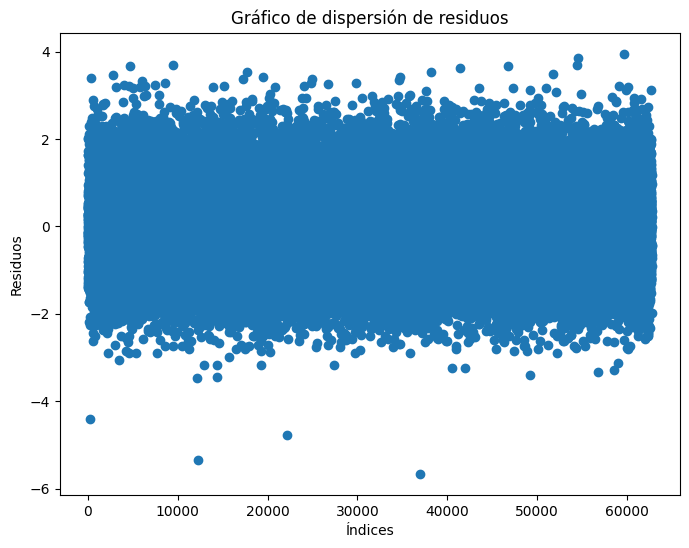

In [55]:
#residuos de la prediccion
residuals = y_train - y_pred
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.3 Entrenamiento de un segundo modelo de regresión lineal (LASSO)

In [56]:
# Crear el modelo
model_lasso = Lasso(alpha=0.01)

# Entrenar el modelo
model_lasso.fit(X_train, y_train)

# Initialize an empty list to store selected features
selected_features = []
selected_features_index = []
feature_names = X.columns
for i, feature in enumerate(feature_names):
  if abs(model_lasso.coef_[i]) > 0.0001:
    selected_features.append(feature)
    selected_features_index.append(i)
    print(f"Coeficiente de {feature}: {model_lasso.coef_[i]}")

print("Intercept: ", model_lasso.intercept_[0])

Coeficiente de FAMI_TIENEAUTOMOVIL_Si: 0.09331526556335319
Coeficiente de FAMI_TIENECOMPUTADOR_Si: 0.1672004687861544
Coeficiente de FAMI_TIENEINTERNET_Si: 0.09708334491976293
Coeficiente de FAMI_TIENELAVADORA_Si: 0.03715635541550848
Coeficiente de FAMI_EDUCACIONMADRE_no presenta: -0.16948571667372098
Coeficiente de FAMI_EDUCACIONMADRE_básica: -0.3646719543010444
Coeficiente de FAMI_EDUCACIONMADRE_media: -0.22366826622641237
Coeficiente de FAMI_EDUCACIONPADRE_no presenta: -0.17728467327865086
Coeficiente de FAMI_EDUCACIONPADRE_básica: -0.2862408594982445
Coeficiente de FAMI_EDUCACIONPADRE_media: -0.166595037117084
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 2: -0.007099244547279206
Coeficiente de FAMI_ESTRATOVIVIENDA_Estrato 3: 0.03161860548665924
Intercept:  0.1500293307646564


**Validación Cuantitativa**

In [57]:
# Obtener las predicciones para el set Train
y_pred_lasso = model_lasso.predict(X_train).reshape(-1,1)
y_train_original = y_train
# MAE
mae_lasso  = mean_absolute_error(y_train_original, y_pred_lasso)
# MSE
mse_lasso  = mean_squared_error(y_train_original, y_pred_lasso)
# RMSE
rmse_lasso  = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_train,y_train))

MAE: 0.7536407146110263
MSE: 0.873693216571508
RMSE: 0.9302476074271382
R2: 0.12630678342849222


In [58]:
# Obtener las predicciones para el set Test
y_pred_test_lasso = model_lasso.predict(X_test)
y_test_original = y_test
# MAE
mae_lasso = mean_absolute_error(y_test_original, y_pred_test_lasso)
# MSE
mse_lasso = mean_squared_error(y_test_original, y_pred_test_lasso)
# RMSE
rmse_lasso = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_test,y_test))

MAE: 0.7558499498706905
MSE: 0.8766338567362586
RMSE: 0.9302476074271382
R2: 0.1287046476329029


**Validación Cualitativa**

In [59]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

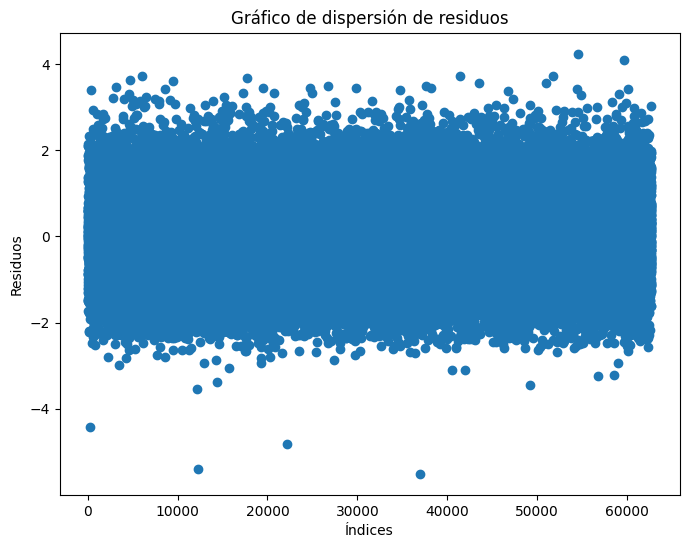

In [60]:
#residuos de la prediccion
residuals = y_train - y_pred_lasso.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.4 Entrenamiento de un tercer modelo de regresión lineal (BAGGING)

In [61]:
from sklearn.ensemble import BaggingRegressor

# Crear el modelo base (Lasso)
model = LinearRegression()

# Crear el modelo Bagging con Lasso como estimador base
bagging_lasso = BaggingRegressor(model, n_estimators=15, random_state=42)

# Entrenar el modelo Bagging
bagging_lasso.fit(X_train[:, selected_features_index], y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=LinearRegression(), n_estimators=15, random_state=42)

**Validación Cuantitativa**

In [62]:
# Obtener las predicciones para el conjunto de entrenamiento
y_pred_train_bagging = bagging_lasso.predict(X_train[:, selected_features_index])
y_train_original = y_train

# Calcular las métricas de evaluación para el conjunto de entrenamiento
mae_train_bagging = mean_absolute_error(y_train_original, y_pred_train_bagging)
mse_train_bagging = mean_squared_error(y_train_original, y_pred_train_bagging)
rmse_train_bagging = np.sqrt(mse_train_bagging)
r2_train_bagging = bagging_lasso.score(X_train[:, selected_features_index], y_train)


# Imprimir las métricas de evaluación
print("Métricas de evaluación para el conjunto de entrenamiento:")
print("MAE:", mae_train_bagging)
print("MSE:", mse_train_bagging)
print("RMSE:", rmse_train_bagging)
print("R2:", r2_train_bagging)

Métricas de evaluación para el conjunto de entrenamiento:
MAE: 0.7483992850522774
MSE: 0.8641425780825209
RMSE: 0.9295926947230819
R2: 0.1358574219174793


In [63]:
# Obtener las predicciones para el conjunto de prueba
y_pred_test_bagging = bagging_lasso.predict(X_test[:, selected_features_index])
y_test_original = y_test

# Calcular las métricas de evaluación para el conjunto de prueba
mae_test_bagging = mean_absolute_error(y_test_original, y_pred_test_bagging)
mse_test_bagging = mean_squared_error(y_test, y_pred_test_bagging)
rmse_test_bagging = np.sqrt(mse_test_bagging)
r2_test_bagging = bagging_lasso.score(X_test[:, selected_features_index], y_test)

# Imprimir los resultados
print("Métricas de evaluación para el conjunto de prueba:")
print("MAE:", mae_test_bagging)
print("MSE:", mse_test_bagging)
print("RMSE:", rmse_test_bagging)
print("R2:", r2_test_bagging)

Métricas de evaluación para el conjunto de prueba:
MAE: 0.7505846967819553
MSE: 0.8669737264482991
RMSE: 0.9311142392039223
R2: 0.13830594988524336


**Validación Cualitativa**

In [64]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

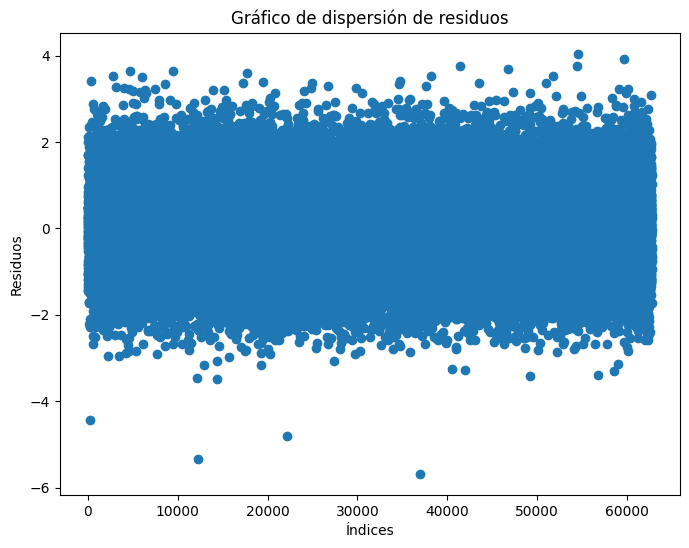

In [65]:
#residuos de la prediccion
residuals = y_train - y_pred_train_bagging.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()